<div id='inicio'></div>

# **Projeto 2 - Ciência dos Dados**

### Grupo: Diego, Enzo, Francisco e Thomas


## A pergunta: 

Qual será o preço de um novo carro  lançado no mercado Americano?

## Onde queremos chegar?

  O projeto gira em torno do desafio de desenvolver um programa capaz de prever o preço de um novo carro chegando no mercado, a partir de suas caracteristicas e aspectos mecânicas.

  Para isso, partiremos de uma [base de dados](https://www.kaggle.com/gagandeep16/car-sales) (DataFrame) selecionada no website Kaggle, que nos traz informações sobre especificações e valores de uma grande quantidade de carros, de diferentes marcas e modelos. 
  
  O objetivo aqui é utilizar três métodos de previsão: a **regressão linear múltipla**, **random forest** e **árvore de regressão** para a criacão do programa. Para isso, explicaremos detalhadamente todo o processo da construção do código e sua validação como um modelo funcional.

## Índice 

- [Importando, estabelecendo e limpando](#inicio)

- [Início da Análise Exploratória](#analexp)

- [Primeiro Modelo - Regressão Linear Múltipla (Aula 24)](#modelo1)

- [Segundo Modelo - Árvore de Regressão](#modelo2)

___

<div id='inicio'>

## 1. Importando, estabelecendo e limpando

Nesta primeira etapa, importamos a bibliotecas que serão utilizadas durante o projeto, definimos os tamanhos e caracerísticas que alguns dos gráficos gerados durante o trabalho terão, carregamos nossa base de dados "Car_sales.csv"para um variável em dataframe, e por último, fizemos limpezas convenientes em tal base de dados.

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns
import matplotlib # importing library to change the default setting
import statsmodels.api as sm
from IPython.display import display
import scipy.stats
import os

# Definindo os parametros dos gráficos 
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] =8
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Data = pd.read_csv('Car_sales.csv')
Data_idx = Data.set_index('Model')
Data_idx.head(7)

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
Model,,,,,,,,,,,,,,,
Integra,Acura,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
TL,Acura,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
CL,Acura,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
RL,Acura,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
A4,Audi,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
A6,Audi,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
A8,Audi,1.380,39.000,Passenger,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858


O uso do `descibe` nos dá um breve resumo de informações importantes sobre as colunas do DataFrame, como média e desvio padrão

In [8]:
Data.describe(include="all").head(7)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
count,157,157,157.000000,121.000000,157,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,157,155.000000
unique,30,156,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130,NaN
top,Ford,Neon,NaN,NaN,Passenger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5/6/2011,NaN
freq,11,2,NaN,NaN,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
mean,NaN,NaN,52.998076,18.072975,NaN,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,NaN,77.043591
std,NaN,NaN,68.029422,11.453384,NaN,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,NaN,25.142664
min,NaN,NaN,0.110000,5.160000,NaN,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,NaN,23.276272


Pequenas análises importantes:

- Parece haver **valores ausentes** (NaN) em algumas colunas (exemplo: __year_resale_value)

- Se considerarmos todas as colunas, teremos muitas variáveis fictícias

Para podermos trabalhar com este DataFrame sem enfrentar problemas com os valores ausentes, iremos limpá-los a partircdo método `drop`

In [9]:
#Retirando colunas que não agregam ao Projeto
data_2 = Data.drop(['Vehicle_type','Latest_Launch'], axis = 1)
data_2.sort_values( by = 'Fuel_capacity', ascending = False)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
42,Dodge,Ram Van,31.038,13.425,18.575,3.9,175.0,127.2,78.8,208.5,4.298,32.0,16.0,70.078322
41,Dodge,Ram Wagon,16.767,15.510,21.315,3.9,175.0,109.6,78.8,192.6,4.245,32.0,15.0,71.135292
18,Cadillac,Escalade,14.785,NaN,46.225,5.7,255.0,117.5,77.0,201.2,5.572,30.0,15.0,109.509117
78,Lincoln,Navigator,22.925,NaN,42.660,5.4,300.0,119.0,79.9,204.8,5.393,30.0,15.0,123.972047
40,Dodge,Ram Pickup,227.061,15.060,19.460,5.2,230.0,138.7,79.3,224.2,4.470,26.0,17.0,90.211700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Plymouth,Prowler,1.872,NaN,43.000,3.5,253.0,113.3,76.3,165.4,2.850,12.0,21.0,106.984456
62,Hyundai,Accent,41.184,5.860,9.699,1.5,92.0,96.1,65.7,166.7,2.240,11.9,31.0,36.672284
57,Honda,Civic,199.685,9.850,12.885,1.6,106.0,103.2,67.1,175.1,2.339,11.9,32.0,42.879097
26,Chevrolet,Metro,21.855,5.160,9.235,1.0,55.0,93.1,62.6,149.4,1.895,10.3,45.0,23.276272


In [10]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Price_in_thousands   155 non-null    float64
 5   Engine_size          156 non-null    float64
 6   Horsepower           156 non-null    float64
 7   Wheelbase            156 non-null    float64
 8   Width                156 non-null    float64
 9   Length               156 non-null    float64
 10  Curb_weight          155 non-null    float64
 11  Fuel_capacity        156 non-null    float64
 12  Fuel_efficiency      154 non-null    float64
 13  Power_perf_factor    155 non-null    float64
dtypes: float64(12), object(2)
memory usage: 17.3+ KB


In [11]:
data_2.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Power_perf_factor       2
dtype: int64

Vemos que há alguns valores Nulos, então devemos limpar um pouco mais o Dataset para não cometer erros e evitar erros ao aplicar os códigos e manipulações futuras. Para isso, utilizaremos `dropna`, que remove automaticamente os valores nulos. 

In [12]:
df_limpo = data_2.dropna()

In [13]:
data_num = df_limpo.select_dtypes(include = ['float64', 'int64']);
data_num.head(7)

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
5,18.780,23.555,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105
6,1.380,39.000,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,134.656858
8,9.231,28.675,33.40,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,81.877069


Feita a limpeza para tirar todos os valores nulos do nosso dataframe, podemos inicar a **Análise Exploratória**

<div id='analexp'>

___

# 2. Análise explanatória Básica

   Aqui plotamos inicialmete gráficos relacionando o nosso **target** ("Sales_in_thousands") com as features, e em seguida, suas determinadas corelações. Por último, depois de conseguir os valores da correlação de cada feature com o target, criamos um histograma de densidade com uma normal plotada em cima, além de um mapa de calor que nos trouxe algumas informações que explicaremos ao longo desta etapa.



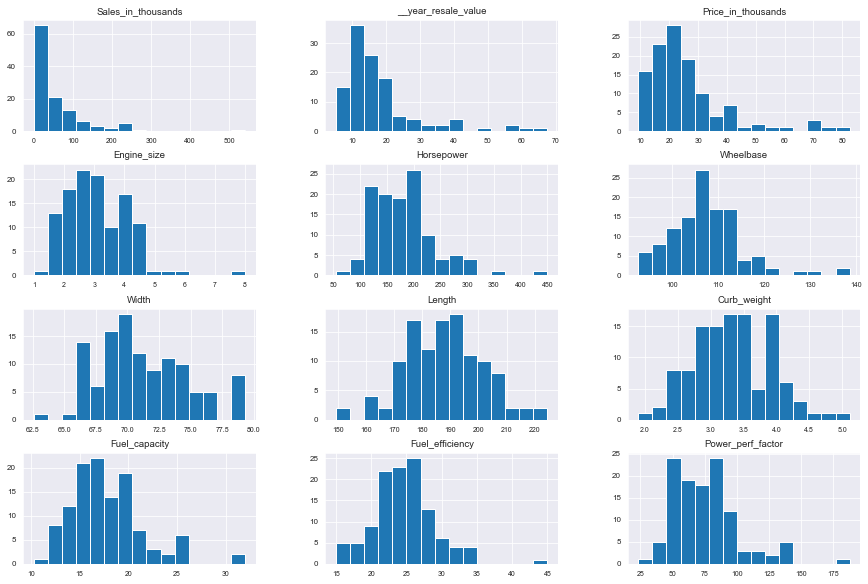

In [14]:
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['figure.figsize'] = (15,10)
data_num.hist(bins=15,xlabelsize=7);

Estabelecendo correlação dos parâmetros com o preço dos carros:

In [15]:
# Correlation with Price_in_thousands
df_corr = data_num.corr()['Price_in_thousands']
df_corr

Sales_in_thousands    -0.251705
__year_resale_value    0.954757
Price_in_thousands     1.000000
Engine_size            0.649170
Horsepower             0.853455
Wheelbase              0.067042
Width                  0.301292
Length                 0.182592
Curb_weight            0.511400
Fuel_capacity          0.406496
Fuel_efficiency       -0.479539
Power_perf_factor      0.905002
Name: Price_in_thousands, dtype: float64

Criando o looping para a criação dos gráficos de correlação:

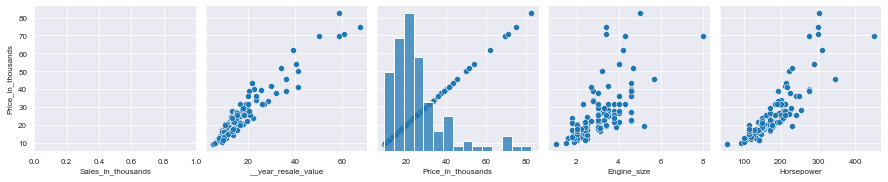

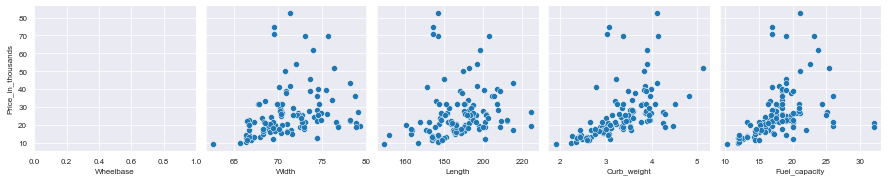

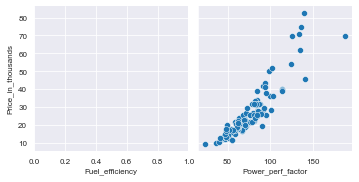

In [16]:
for i in range(0, len(data_num.columns),5):
    sns.pairplot(data_num, y_vars ='Price_in_thousands', x_vars = data_num.columns[i:i+5]  )

### Com isso podemos ver que:

- Sales_in_thousands    (-0.304734) --> **Correlação negativa e fraca**

- __year_resale_value   ( 0.953840) --> **Correlação positiva e forte**

- Engine_size           ( 0.626875) --> **Correlação positiva e forte**

- Horsepower            ( 0.839744) --> **Correlação positiva e forte**

- Wheelbase             ( 0.110513) --> **Correlação positiva e fraca**

- Width                 ( 0.329136) --> **Correlação positiva e fraca**

- Length                ( 0.156935) --> **Correlação positiva e fraca**

- Curb_weight           ( 0.526224) --> **Correlação positiva e fraca** 

- Fuel_capacity         ( 0.423282) --> **Correlação positiva e fraca** 

- Fuel_efficiency       (-0.492157) --> **Correlação negativa e fraca**

- Power_perf_factor     ( 0.905002) --> **Correlação positiva e forte**

C:\Users\Diego\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


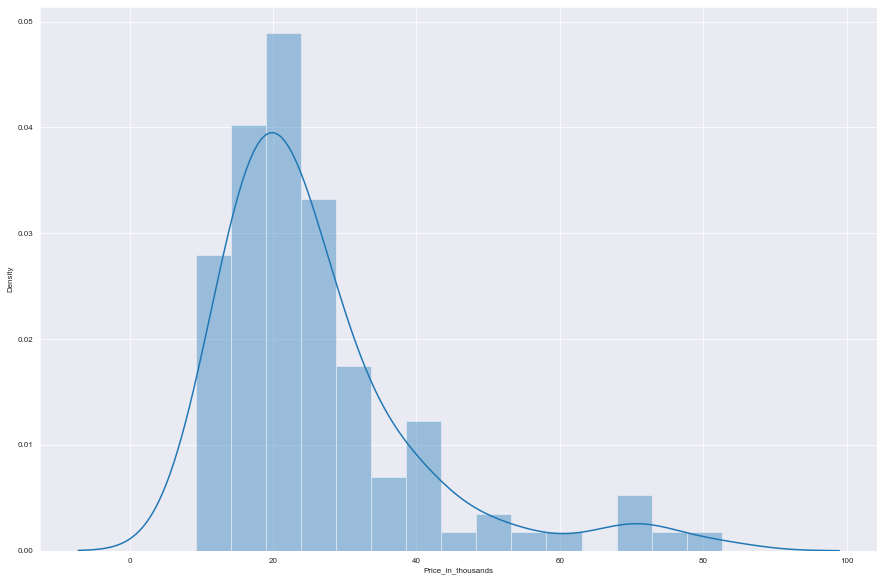

In [17]:
#Criando o histograma com a normal:

sns.distplot(data_num['Price_in_thousands']);

In [18]:
data_num.Price_in_thousands.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1])

count    117.000000
mean      25.969487
std       14.149699
min        9.235000
25%       16.980000
50%       21.665000
75%       29.465000
85%       37.174600
90%       41.658000
100%      82.600000
max       82.600000
Name: Price_in_thousands, dtype: float64

### Inferência:

- O gráfico parecia **inclinado à direita**, o que significa que **a maioria dos preços no conjunto de dados é baixa** (abaixo de 30.000).

- Existe uma diferença significativa entre a média e a mediana da distribuição de preços.

- Os pontos de dados estão um pouco distantes da média, o que indica uma **grande variação** nos preços dos automóveis. (85% dos preços estão abaixo de 37.1746, enquanto os 15% restantes estão entre 37.1746 e 82.600).

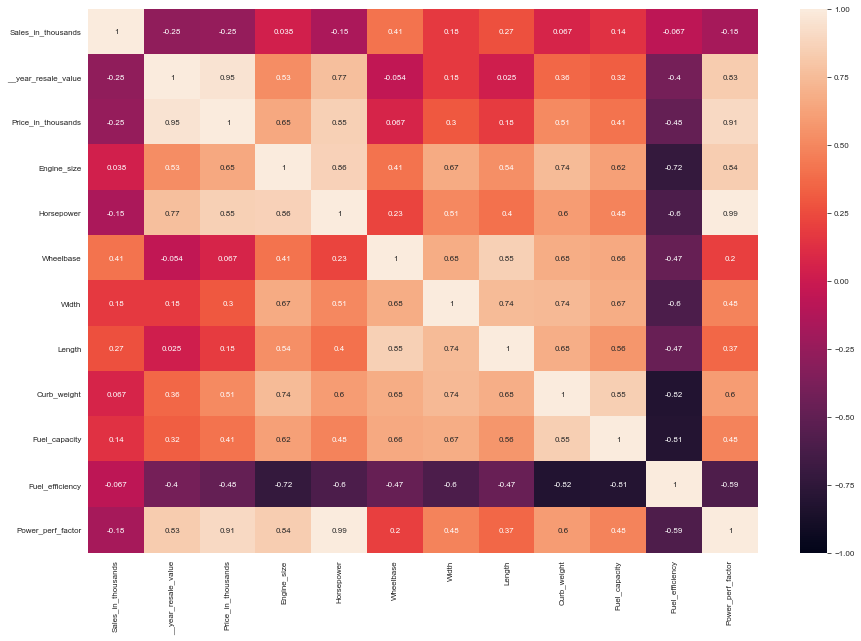

In [19]:
# Criando mapa de calor:

sns.heatmap(data_num.corr(), annot=True, vmin=-1, vmax=1);

A partir do mapa de calor podemos mapear as correlações entre todas as variáveis, e não apenas entre elas e o preço.

Dessa forma, podemos analisar melhor os dados e inclusive identificar futuros possíveis problemas, como a correlação entre "Horsepower" e "Power perf factor", de 0,99. Sabendo do que se trata cada variável, pode-se concluir que uma foi calculada a partir da outra.

<div id='modelo1'></div>

___

# Primeira Modelagem: Regressão Linear 

Nesta primeira modelagem, realizaremos a regressão linear, assim como feito no modelo da Aula 24. Este modelo tem como objetico explicar como uma variável se comporta em função de outras. Em outras palavras, utilizaremos **variáveis independentes** (features, no caso as especificações dos carros) para explicar o comportamente da **variável dependente** (target, no caso o preço do carro). 

Primeiramente, criaremos uma função (`regress`) para fazer automaticamente a regressão entre os parâmetros 


In [20]:
### Função utilitária para fazer a regressão com constante adicionada

def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET - Preço)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES - Especificações)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

### Passo 1: Ajustando o modelo

Ajuste do modelo considerando Preço como **resposta** (dependente) e as demais variáveis da base de dados como **explicativas**. Para isso, separaremos e armazenaremos as colunas (target e features) em diferentes variáveis.


In [21]:
X = data_num[['Sales_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase',
              'Width', 'Length','Curb_weight','Fuel_capacity','Fuel_efficiency']]
Y = data_num['Price_in_thousands']

Nota-se que a coluna "Power perf factor" foi retirada da análise, justamente pela conclusão obtida a partir do `heatmap`. A correlação extremamente alta dela com "Horsepower" influenciaria os cálculos, dado que estaríamos utilizando duas variáveis praticamente iguais. 

Além disso, o **R-quadrado** (R²) do modelo com a inclusão do "Power perf factor" resultaria em um valor extremamente alto, o que teoricamente é bom, mas indicava um erro na modelagem, tendo em vista essa alta colinearidade.

-  R-quadrado (R² ou o coeficiente de determinação) é uma medida estatística em um modelo de regressão que determina a proporção da variância na variável dependente que pode ser explicada pela variável independente. Em outras palavras, R-quadrado mostra o quão bem os dados se ajustam ao modelo de regressão (a qualidade do ajuste).

In [22]:
results = regress(Y,X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Price_in_thousands   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     53.36
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           1.54e-35
Time:                        17:36:17   Log-Likelihood:                -375.93
No. Observations:                 117   AIC:                             771.9
Df Residuals:                     107   BIC:                             799.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 22.9764     18.215      1.261      0.210     -13.133      59.086
Sales_in_thousands -3.689e-05      0.009     -0.004      0.997      -0.019       0.019
Engine_size           -4.7238      1.464     -3.227      0.002      -7.626      -1.822
Horsepower             0.2659      0.022     12.293      0.000       0.223       0.309
Wheelbase             -0.1035      0.182     -0.567      0.572      -0.465       0.258
Width                 -0.4165      0.299     -1.391      0.167      -1.010       0.177
Length                -0.2155      0.100     -2.158      0.033      -0.414      -0.018
Curb_weight           10.1626      2.583      3.935      0.000       5.043      15.282
Fuel_capacity          0.2923      0.352      0.831      0.408      -0.405       0.990
Fuel_efficiency        0.4738      0.278      1.705      0.091      -0.077       1.025
==============================================================================
Omnibus:                       36.464   Durbin-Watson:                   1.475
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.214
Skew:                           1.230   Prob(JB):                     1.40e-18
Kurtosis:                       6.288   Cond. No.                     9.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Retiramos a variável "Sales_in_thousands" e "Whellbase" devido ao alto **valor-p** (acima de 0,7), indicando irrelevância na modelagem.

- Em estatística, o valor **P** é a probabilidade de se obter resultados tão extremos quanto os resultados observados em um teste de hipótese estatística, assumindo que a hipótese nula está correta. O valor **P** é usado como uma alternativa aos pontos de rejeição para fornecer o menor nível de significância no qual a hipótese nula seria rejeitada. Um valor **P** menor significa que há evidências mais fortes a favor da hipótese alternativa, ou seja quanto menor for, maior será a significância estatística da diferença observada.

In [23]:
X2 = data_num [['Horsepower','Width', 'Length','Curb_weight','Fuel_capacity','Fuel_efficiency']]

results2 = regress(Y,X2)
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Price_in_thousands   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     72.55
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           5.93e-36
Time:                        17:36:17   Log-Likelihood:                -381.88
No. Observations:                 117   AIC:                             777.8
Df Residuals:                     110   BIC:                             797.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              33.0746     18.323      1.805      0.074      -3.236      69.385
Horsepower          0.2190      0.014     16.060      0.000       0.192       0.246
Width              -0.6916      0.299     -2.315      0.022      -1.284      -0.099
Length             -0.2628      0.071     -3.699      0.000      -0.404      -0.122
Curb_weight         8.7141      2.551      3.417      0.001       3.659      13.769
Fuel_capacity       0.3482      0.335      1.039      0.301      -0.316       1.012
Fuel_efficiency     0.6880      0.276      2.490      0.014       0.140       1.236
==============================================================================
Omnibus:                       34.213   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.235
Skew:                           1.206   Prob(JB):                     9.24e-16
Kurtosis:                       5.896   Cond. No.                     8.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Retiramos a varável "Engine_size" e "Width" devido ao alto **valor-p** (acima de 0,4), indicando inrelevância na modelagem.

In [24]:
X3 = data_num [[ 'Horsepower', 'Length','Curb_weight','Fuel_capacity','Fuel_efficiency']]

results3 = regress(Y,X3)
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Price_in_thousands   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     82.74
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           8.24e-36
Time:                        17:36:17   Log-Likelihood:                -384.66
No. Observations:                 117   AIC:                             781.3
Df Residuals:                     111   BIC:                             797.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.3924     13.759      0.319      0.750     -22.871      31.656
Horsepower          0.2141      0.014     15.590      0.000       0.187       0.241
Length             -0.3442      0.063     -5.471      0.000      -0.469      -0.220
Curb_weight         8.0473      2.583      3.115      0.002       2.928      13.167
Fuel_capacity       0.2156      0.337      0.641      0.523      -0.451       0.883
Fuel_efficiency     0.6961      0.282      2.472      0.015       0.138       1.254
==============================================================================
Omnibus:                       36.153   Durbin-Watson:                   1.271
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.230
Skew:                           1.241   Prob(JB):                     1.03e-17
Kurtosis:                       6.144   Cond. No.                     5.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Retiramos a varável "Fuel_cappacity" devido ao alto **valor-p** (acima de 0,2), indicando inrelevância na modelagem.

In [25]:
X3 = data_num [[ 'Horsepower', 'Length','Curb_weight','Fuel_efficiency']]

results3 = regress(Y,X3)
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Price_in_thousands   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     103.9
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           9.27e-37
Time:                        17:36:17   Log-Likelihood:                -384.88
No. Observations:                 117   AIC:                             779.8
Df Residuals:                     112   BIC:                             793.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.2840     12.963      0.562      0.575     -18.401      32.969
Horsepower          0.2126      0.013     15.752      0.000       0.186       0.239
Length             -0.3422      0.063     -5.460      0.000      -0.466      -0.218
Curb_weight         8.8267      2.273      3.883      0.000       4.323      13.331
Fuel_efficiency     0.6236      0.257      2.424      0.017       0.114       1.133
==============================================================================
Omnibus:                       37.259   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.343
Skew:                           1.277   Prob(JB):                     2.17e-18
Kurtosis:                       6.188   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Tendo o modelo ajustado, com as colunas necessárias sendo retiradas, podemos então manipular os dados e trabalhar com eles.

Nesse caso, criaremos agora um gráfico 

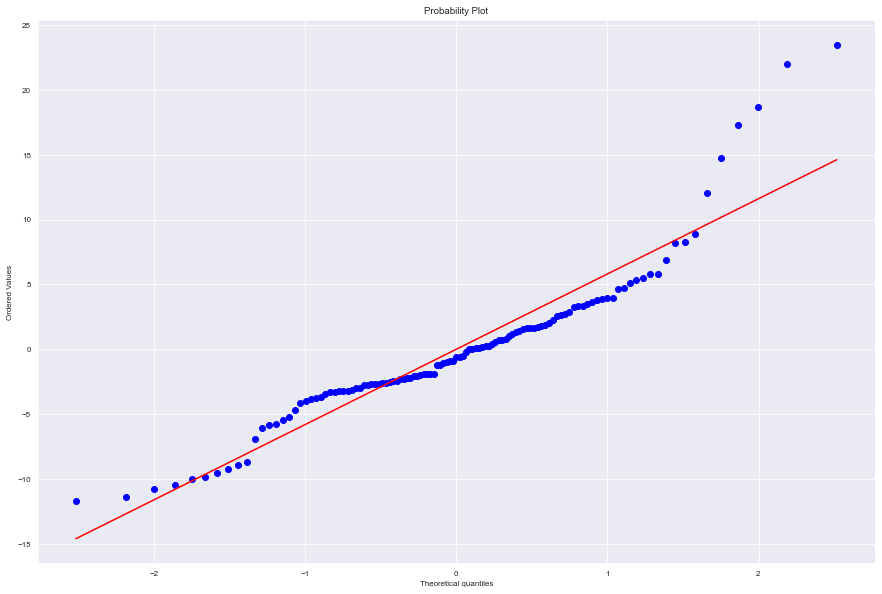

In [26]:
from scipy.stats import norm, probplot

scipy.stats.probplot(results.resid, dist= 'norm', plot =plt);

Tendo em vista a interpretação os gráficos acima, nota-se que a variância dos resíduos está crescendo dando indicativo que a suposição de homocedasticidade deva estar violada. Uma solução pode ser a transformação nas variáveis dependente e/ou independentes ou usar modelos de regressão mais robustos. 
Para isso, vamos fazer um ajuste usando a escala de log para as variáveis de X.

In [27]:
data_num['Engine_size'] = np.log(data_num[ 'Engine_size'])
data_num['Fuel_efficiency'] = np.log(data_num[ 'Fuel_efficiency'])
data_num['Length'] = np.log(data_num[ 'Length'])
data_num['Curb_weight'] = np.log(data_num['Curb_weight'])

X4 = data_num [[ 'Horsepower', 'Length','Curb_weight','Fuel_efficiency']]


results4 = regress(Y,X4)
results4.summary()

<ipython-input-27-4d71e3546df2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num['Engine_size'] = np.log(data_num[ 'Engine_size'])
<ipython-input-27-4d71e3546df2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num['Fuel_efficiency'] = np.log(data_num[ 'Fuel_efficiency'])
<ipython-input-27-4d71e3546df2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Price_in_thousands   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     101.8
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           2.21e-36
Time:                        17:36:17   Log-Likelihood:                -385.79
No. Observations:                 117   AIC:                             781.6
Df Residuals:                     112   BIC:                             795.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             250.8494     57.609      4.354      0.000     136.705     364.994
Horsepower          0.2111      0.014     15.463      0.000       0.184       0.238
Length            -67.2588     12.562     -5.354      0.000     -92.149     -42.369
Curb_weight        30.6404      8.446      3.628      0.000      13.906      47.374
Fuel_efficiency    16.5672      6.751      2.454      0.016       3.191      29.944
==============================================================================
Omnibus:                       36.807   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.314
Skew:                           1.275   Prob(JB):                     9.87e-18
Kurtosis:                       6.093   Cond. No.                     1.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

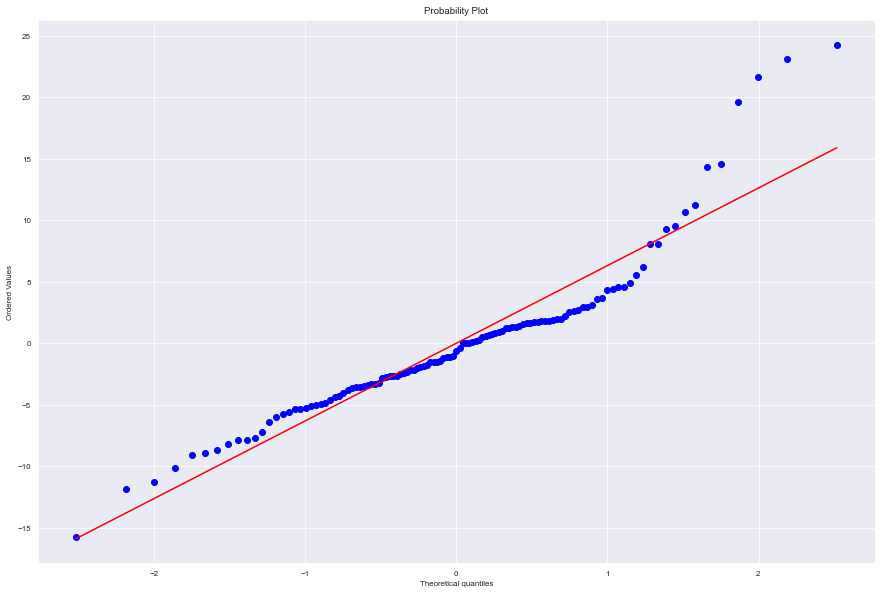

In [28]:
scipy.stats.probplot(results4.resid, dist= 'norm', plot =plt);

Feito o ajuste podemos concluir que esse não é a melhor transformação a ser feita, uma vez que o R-quadrado do moelo utilizando log é menor do que aquele sem a transformação, portanto a proporção da variância na variável dependente que pode ser explicada pela variável independente no modelo transformado é menor que no modelo normal, abrindo espaço para outra transformação ou contentar-se com o modelo atual. Além disso, o gráfico de resíduos não muda nada significamente comparado à análise anterior.

### Escalando os dados - Usando sklearn

In [29]:
from sklearn.preprocessing import StandardScaler

targets = data_num['Price_in_thousands']
inputs = data_num [[ 'Horsepower', 'Length','Curb_weight','Fuel_efficiency']]

Aqui vamos utilizar outra biblioteca para calcular a regressão linear 

Usando treino e teste 

In [30]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X3,targets,test_size = 0.2, random_state=40)

Criando a regressão

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
LinearRegression()

# Construindo então regressão Linear
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X3, Y);

print (reg.score(X3, Y))
print (reg.coef_)
# TESTE

0.7876702175266938
[ 0.21261884 -0.34220964  8.82668508  0.62356118]




Podemos ver que utilizando outra biblioteca os valores de R-quadrado (score) e os coeficientes de cada parâmetro são iguais ao que fizemos na primeira modelagem. Portanto, vamos fazer o teste e treino com esse modelo. Mas a outra regressão ainda é de suma importância tendo em vista que mostra parâmetros que a essa não faz. 



Usando a função predict para prever os valores de x

In [32]:
y_hat = model.predict(x_train)

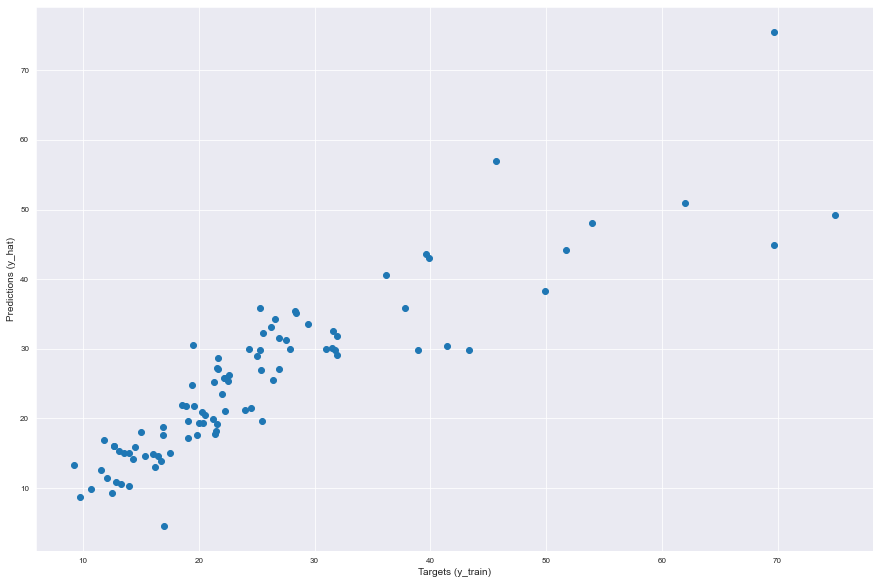

In [33]:
plt.scatter(y_train,y_hat)
plt.xlabel("Targets (y_train)", size = 10)
plt.ylabel("Predictions (y_hat)", size = 10)
plt.show()

No gráfico acima, podemos ver que a distribuição dos pontos está de certa forma precisa, mas quanto maior o preço, a defasagem vai aumentando também. Mas o modelo conseguiu um score de 78% o que já é um resultado bom.

In [34]:
model.score(x_train, y_train)

0.7853281281970949

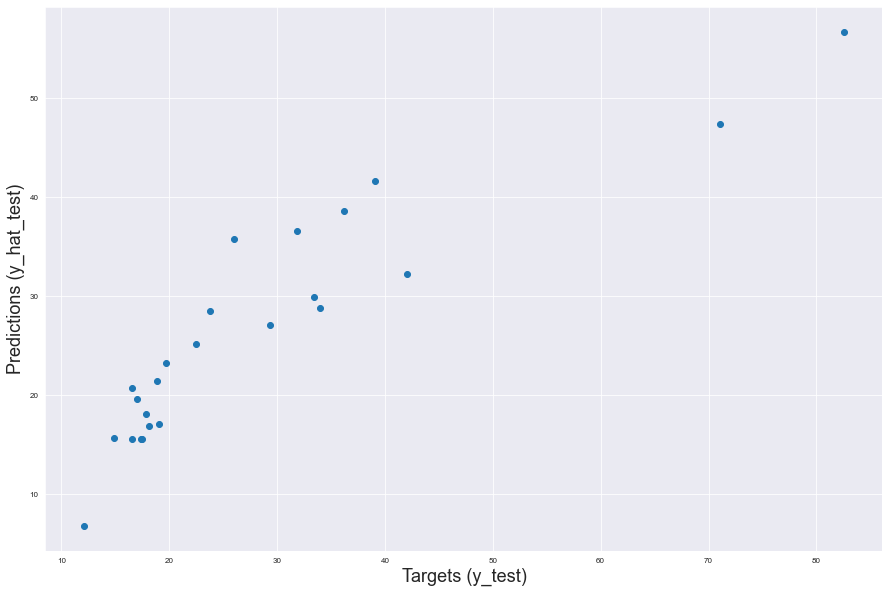

In [35]:
#predict dos valores de treino 
y_hat_test = model.predict(x_test)
plt.scatter(y_test,y_hat_test)
plt.xlabel("Targets (y_test)", size = 18)
plt.ylabel("Predictions (y_hat_test)", size = 18)
plt.show()

In [36]:
df_pf = pd.DataFrame(y_hat_test,columns=['Preço de venda predito'])
df_pf.head()

,Preço de venda predito
0,56.698189
1,35.795437
2,29.859573
3,6.766070
4,28.522402


In [37]:
y_test = y_test.reset_index(drop=True)
df_pf['Preço de venda real'] = y_test
df_pf.head()

,Preço de venda predito,Preço de venda real
0,56.698189,82.600
1,35.795437,26.000
2,29.859573,33.400
3,6.766070,12.050
4,28.522402,23.755


In [38]:
df_pf['Errors'] = df_pf['Preço de venda real'] - df_pf['Preço de venda predito']
df_pf['Difference%'] = np.absolute(df_pf['Errors']/df_pf['Preço de venda real']*100)
df_pf.head()

,Preço de venda predito,Preço de venda real,Errors,Difference%
0,56.698189,82.600,25.901811,31.358124
1,35.795437,26.000,-9.795437,37.674758
2,29.859573,33.400,3.540427,10.600080
3,6.766070,12.050,5.283930,43.850044
4,28.522402,23.755,-4.767402,20.069048


In [39]:
df_pf.describe()

,Preço de venda predito,Preço de venda real,Errors,Difference%
count,24.000000,24.000000,24.000000,24.000000
mean,26.412164,28.218833,1.806669,16.031115
std,11.803523,17.212027,8.180373,11.158790
min,6.766070,12.050000,-9.795437,0.940616
25%,16.969119,17.464250,-2.586003,7.521253
50%,24.145090,21.115000,0.403235,12.350190
75%,33.080657,33.537500,2.560693,20.899565
max,56.698189,82.600000,25.901811,43.850044


Nessa análise, comparamos o Preço calculado pelo modelo, o preço real, o erro entre os dois e essa diferença em porcentagem. Conseguimos concluir então que a média de erro do modelo na predição do preço foi de 16% e o erro máximo foi de 44%, o que é muito alto, mas já tinhamos analisado que isso ocorreu quando o modelo preve o preço de um carro com o preço muito acima dos outros, portanto uma defasagem mais aceitável por esse valor poder ser um outlier. Mas ainda assim, no percentil de 50% o erro foi de 12%, menor do que a média, indicando que essa média é muito influenciada pelos valores muito acima da média.

C:\Users\Diego\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


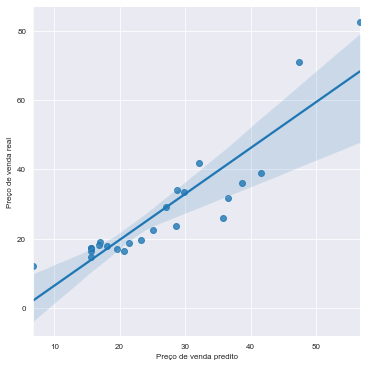

In [40]:
sns.lmplot('Preço de venda predito','Preço de venda real',data=df_pf)

No gráfico acima podemos ver o que está descrito nas tabelas anteriores e percebemos que os preços fora da área azul clara, tem um erro muito grande de predição para seu valor real. Além disso, conclui-se que quanto maior o preço real mais larga é a área de predição o que indica um erro maior, do que quando comparado aos valores médios.

### 2. Random Forest

- O Random Forest Classifier é um conjunto de árvores de decisão de um subconjunto do conjunto de treinamento selecionado aleatoriamente.
- Ele agrega os votos de diferentes árvores de decisão para decidir a classe final do objeto de teste.
- É um algoritmo de aprendizagem baseado em árvore de ensemble.
- Algoritmos de conjunto são aqueles que combinam mais de um algoritmo do mesmo tipo ou de tipo diferente para classificar objetos.
- É um dos algoritmos de aprendizagem mais precisos disponíveis. Para muitos conjuntos de dados, ele produz um classificador de alta precisão.
- Ele é executado de forma eficiente em grandes bancos de dados.
- Ele pode lidar com milhares de variáveis de entrada sem exclusão de variável.


In [41]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators = 10,random_state=0)
rf_reg.fit(X,Y.ravel())

print(f'R² score: {r2_score(Y, rf_reg.predict(X))*100}')

R² score: 96.61213709557326


In [42]:
rf_reg.feature_importances_

array([0.08978529, 0.01348671, 0.74019899, 0.03236032, 0.01140652,
       0.02741465, 0.02452715, 0.02755677, 0.03326359])

O comando "feature importances" mostra a importancia das variáveis do Dataframe para o classificador, em ordem: ('Sales_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width','Length','Curb_weight','Fuel_capacity','Fuel_efficiency'). Assim, podemos ver que a mais importante para o modelo é de longe "Horsepower", o que condiz com os nosso outros modelos em que essa variável se mostra muito importante para responder nossa pergunta. No entanto, o R-quadrado alto pode ser consequência de uma alta colinearidade entra algumas váriaveis que nos outros modelos limpamos de forma que le fique mais preciso.

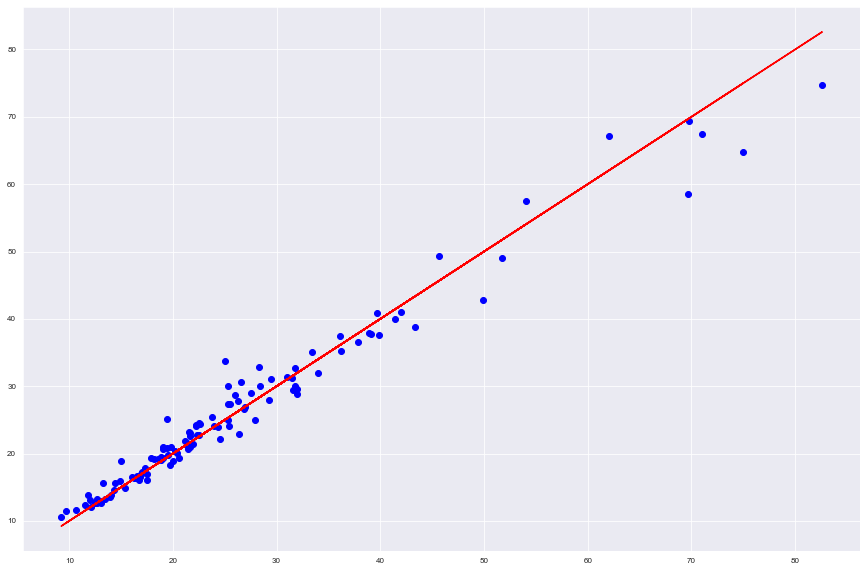

In [43]:
predictArray_rf = rf_reg.predict(X)
plt.scatter(Y,predictArray_rf, color="b")
plt.plot(Y,Y, color="r")

<div id='modelo2'></div>

___
## Modelo de Árvore de Regressão

- [início](#inicio)

Uma Árvore de Decisão/Regressão é uma árvore (e um tipo de gráfico acíclico direcionado) em que os nós representam decisões , transições aleatórias ou nós terminais, e as arestas ou ramos são binários (sim / não , verdadeiro / falso) representando caminhos possíveis de um nó para outro. O tipo específico de árvore de decisão usado para machine learning não contém transições aleatórias. Para usar uma árvore de decisão para classificação ou regressão, pega-se uma linha de dados ou um conjunto de recursos e começa na raiz e, em seguida, por meio de cada nó de decisão subsequente até o nó terminal. O processo é muito intuitivo e fácil de interpretar, o que permite que árvores de decisão treinadas sejam usadas para seleção de variáveis.

Para este modelo, vamos continuar utilizando os valores de:

- X : Colunas do dataframe que serão utilizadas como variáveis explicativas (FEATURES), no caso, as especificações dos carros

- Y : Coluna do dataframe referente à variável resposta (TARGET), no caso, o preço do carro. 

Primeiramente, vamos utilizar a base de treinamento para realizar a regressão.

Feita, iremos prever os resultados a partir dos dados de teste (x_teste) e então comparar com os dados reais (y_teste). 

In [44]:
# Criando o objeto de 'DecisionTreeRegressor'
from sklearn.tree import DecisionTreeRegressor 

regressor = DecisionTreeRegressor(random_state=0)

# Ajustando o módulo regressor ao nosso projeto

regressor = regressor.fit(x_train, y_train);

In [45]:
# Prevendo o valor baseado nos teste
y_pred = regressor.predict(x_test)

In [46]:
# Comparando os valores obtidos pela regressão e os valores reais
r = regress(y_test, y_pred)
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Price_in_thousands   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     198.0
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           1.77e-12
Time:                        17:36:18   Log-Likelihood:                -74.210
No. Observations:                  24   AIC:                             152.4
Df Residuals:                      22   BIC:                             154.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6212      2.344     -0.265      0.793      -5.482       4.239
x1             1.0305      0.073     14.070      0.000       0.879       1.182
==============================================================================
Omnibus:                        1.453   Durbin-Watson:                   2.292
Prob(Omnibus):                  0.484   Jarque-Bera (JB):                1.201
Skew:                           0.516   Prob(JB):                        0.549
Kurtosis:                       2.631   Cond. No.                         66.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Obtendo a Árvore de Regressão

from sklearn.tree import export_graphviz 
features = [ 'Horsepower', 'Length','Curb_weight','Fuel_efficiency']
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(regressor, out_file ='tree.dot',
               feature_names =features)